In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv(r'C:\Users\vipul\Desktop\Udemy\Part 3 - Classification\Section 14 - Logistic Regression\Social_Network_Ads.csv')

In [3]:
x = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [5]:
sc_x = StandardScaler()

In [6]:
x_train = sc_x.fit_transform(x_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
x_test = sc_x.transform(x_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.svm import SVC
reg = SVC(kernel = 'rbf')

In [9]:
reg.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
y_pred = reg.predict(x_test)

In [11]:
cm = confusion_matrix(y_pred,y_test)

In [12]:
print(cm)

[[64  3]
 [ 4 29]]


In [13]:
acc= cross_val_score(reg , x_train ,y_train ,cv = 10)
#it has 10 accuricies to evaluate our model..ye hmarev test ke k*k(let take k=10) parts bana lega and then 99 se train krega and
#1 se evaluate and will do this 10 times..cv btata hai k

In [15]:
print(acc)
#bht alg alg accuracies aa rahi hain...and we say our accuracy to be average of them all
print(acc.mean())

[ 0.80645161  0.96666667  0.8         0.93333333  0.86666667  0.83333333
  0.93333333  0.93333333  0.96666667  0.96551724]
0.900530218762


In [152]:
x1,x2 = np.meshgrid(np.arange(start = x_train[:,0].min() - 1,stop = x_train[:,0].max() + 1,step = 0.01),
                    np.arange(start = x_train[:,1].min() - 1,stop = x_train[:,1].max() + 1,step = 0.01))
plt.contourf(x1,x2,reg.predict((np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha = 0.75,
                                     cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],c= ListedColormap(('red','green'))(i),label = j)

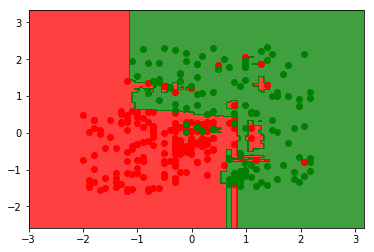

In [153]:
plt.show()